In [1]:
import sys

# setting path
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np
from Q_Learning import train as train_default, make_QTables as make_QTables_default
from Q_Learning_ck import train as train_ck, make_QTables as make_QTables_ck
from Q_Learning_colf import train as train_colf, make_QTables as make_QTables_colf, makeEmptyTables as makeEmptyTables_colf
from Q_Learning_ck_colf import train as train_ck_colf, make_QTables as make_QTables_ck_colf, makeEmptyTables as makeEmptyTables_ck_colf

from extended_pd import parallel_env

In [2]:
env = parallel_env()

# Lists to store results for each gamma
mean_rewards_list = []

In [3]:
trials = 1

tot_rew = []

# List of tuples, each containing the relevant imports
implementations = [
    ("Q_Learning"),
    ("Q_Learning_ck"),
    ("Q_Learning_colf"),
    ("Q_Learning_CK_COLF")
]

for t in range(trials):

    alfa = 0.01
    gamma = 0.8
    adecay = 0.0001
    lamb = 0.1

    tot_rew_per_episode = []

    for implementation in implementations:

        if (implementation == "Q_Learning"):
            env = parallel_env()
            observations, infos = env.reset()
            qtables = make_QTables_default(env, gamma)
            qtables, tot_rew_per_gamma = train_default(env, 50000, 0, 0.2, 0.000006, 100, qtables, gamma, alfa, adecay)
            tot_rew_per_episode.append(tot_rew_per_gamma)
        
        elif (implementation == "Q_Learning_ck"):
            env = parallel_env()
            observations, infos = env.reset()
            qtables = make_QTables_ck(env, gamma)
            qtables, tot_rew_per_gamma = train_ck(env, 50000, 0, 0.2, 0.000006, 100, qtables, gamma, alfa, adecay)
            tot_rew_per_episode.append(tot_rew_per_gamma)

        elif (implementation == "Q_Learning_colf"):
            env = parallel_env()
            observations, infos = env.reset()
            qtables = make_QTables_colf(env, gamma)
            stables = makeEmptyTables_colf(env)
            ptables = makeEmptyTables_colf(env)
            qtables, tot_rew_per_gamma = train_colf(env, 50000, 0, 0.2, 0.000006, 100, qtables, ptables, stables, gamma, alfa, adecay, 4, lamb)
            tot_rew_per_episode.append(tot_rew_per_gamma)

        elif (implementation == "Q_Learning_CK_COLF"):
            env = parallel_env()
            observations, infos = env.reset()
            qtables = make_QTables_ck_colf(env, gamma)
            stables = makeEmptyTables_ck_colf(env)
            ptables = makeEmptyTables_ck_colf(env)
            qtables, tot_rew_per_gamma = train_ck_colf(env, 50000, 0, 0.2, 0.000006, 100, qtables, ptables, stables, gamma, alfa, adecay, 4, lamb)
            tot_rew_per_episode.append(tot_rew_per_gamma)
        
    tot_rew.append(tot_rew_per_episode)



100%|██████████| 50000/50000 [10:49<00:00, 76.96it/s]


In [4]:
my_array = np.array(tot_rew)

average_payoffs = np.mean(my_array, axis=0)

average_payoffs.shape

(4, 50000)

In [5]:
average_payoffs = np.transpose(average_payoffs)

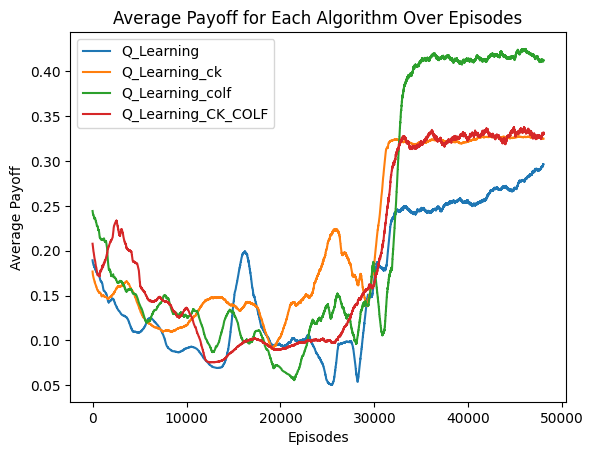

In [6]:
# Calculate the average payoff for each algorithm
average_payoffs = np.mean(my_array, axis=0)

# Transpose the array for plotting
average_payoffs = np.transpose(average_payoffs)

# Set the window size for smoothing the plot
window_size = 2000

# Create a plot
fig, ax = plt.subplots()

# Plot each line for different algorithms with smoothing
for i, algo_name in enumerate(implementations):
    smoothed_values = np.convolve(average_payoffs[:, i], np.ones(window_size)/window_size, mode='valid')
    ax.plot(smoothed_values, label=algo_name)

# Set labels and title
ax.set_xlabel('Episodes')
ax.set_ylabel('Average Payoff')
ax.set_title('Average Payoff for Each Algorithm Over Episodes')

# Add legend
ax.legend()

# Show the plot
plt.show()
